<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Supress-autoscrolling" data-toc-modified-id="Supress-autoscrolling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supress autoscrolling</a></span></li><li><span><a href="#Draw-a-moist-adiabat-through-the-LFC" data-toc-modified-id="Draw-a-moist-adiabat-through-the-LFC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Draw a moist adiabat through the LFC</a></span><ul class="toc-item"><li><span><a href="#Grab-a-Little-Rock-soundings" data-toc-modified-id="Grab-a-Little-Rock-soundings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Grab a Little Rock soundings</a></span></li><li><span><a href="#Select-one-sounding" data-toc-modified-id="Select-one-sounding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select one sounding</a></span></li><li><span><a href="#Save-the-metadata-for-plotting" data-toc-modified-id="Save-the-metadata-for-plotting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Save the metadata for plotting</a></span></li><li><span><a href="#Convert-temperature-and-dewpoint-to-skew-coords" data-toc-modified-id="Convert-temperature-and-dewpoint-to-skew-coords-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Convert temperature and dewpoint to skew coords</a></span></li><li><span><a href="#Plot-the-sounding,-making-the-sounding-lines-thicker" data-toc-modified-id="Plot-the-sounding,-making-the-sounding-lines-thicker-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot the sounding, making the sounding lines thicker</a></span></li><li><span><a href="#turn-off-log(0)-warning" data-toc-modified-id="turn-off-log(0)-warning-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>turn off log(0) warning</a></span></li><li><span><a href="#find-the-$\theta_{es}$-of-the-surface-air,-draw-the-adiabat-through-point" data-toc-modified-id="find-the-$\theta_{es}$-of-the-surface-air,-draw-the-adiabat-through-point-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>find the $\theta_{es}$ of the surface air, draw the adiabat through point</a></span></li></ul></li></ul></div>

# Supress autoscrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Draw a moist adiabat through the LFC

In [2]:
import numpy as np
import pandas as pd
from pprint import pformat

from a405.thermo.constants import constants as c
from a405.thermo.thermlib import convertSkewToTemp, convertTempToSkew
from a405.skewT.fullskew import makeSkewWet,find_corners,make_default_labels

In [3]:
from a405.soundings.wyominglib import write_soundings, read_soundings
from matplotlib import pyplot as plt

## Grab a Little Rock soundings

In [4]:
values=dict(region='naconf',year='2012',month='7',start='0100',stop='3000',station='72340')
write_soundings(values, 'littlerock')
soundings= read_soundings('littlerock')

684502
header is:  72340 LZK Little Rock Observations at 00Z 01 Jul 2012
here is the day:  120701
here is the day:  120701
here is the day:  120702
here is the day:  120702
here is the day:  120703
here is the day:  120703
here is the day:  120704
here is the day:  120704
here is the day:  120705
here is the day:  120705
here is the day:  120706
here is the day:  120706
here is the day:  120707
here is the day:  120707
here is the day:  120708
here is the day:  120708
here is the day:  120709
here is the day:  120709
here is the day:  120710
here is the day:  120710
here is the day:  120711
here is the day:  120711
here is the day:  120712
here is the day:  120712
here is the day:  120713
here is the day:  120713
here is the day:  120714
here is the day:  120714
here is the day:  120715
here is the day:  120715
here is the day:  120716
here is the day:  120716
here is the day:  120717
here is the day:  120717
here is the day:  120718
here is the day:  120718
here is the day:  120719
he

In [5]:
soundings['sounding_dict'].keys()

dict_keys([(2012, 7, 1, 0), (2012, 7, 1, 12), (2012, 7, 2, 0), (2012, 7, 2, 12), (2012, 7, 3, 0), (2012, 7, 3, 12), (2012, 7, 4, 0), (2012, 7, 4, 12), (2012, 7, 5, 0), (2012, 7, 5, 12), (2012, 7, 6, 0), (2012, 7, 6, 12), (2012, 7, 7, 0), (2012, 7, 7, 12), (2012, 7, 8, 0), (2012, 7, 8, 12), (2012, 7, 9, 0), (2012, 7, 9, 12), (2012, 7, 10, 0), (2012, 7, 10, 12), (2012, 7, 11, 0), (2012, 7, 11, 12), (2012, 7, 12, 0), (2012, 7, 12, 12), (2012, 7, 13, 0), (2012, 7, 13, 12), (2012, 7, 14, 0), (2012, 7, 14, 12), (2012, 7, 15, 0), (2012, 7, 15, 12), (2012, 7, 16, 0), (2012, 7, 16, 12), (2012, 7, 17, 0), (2012, 7, 17, 12), (2012, 7, 18, 0), (2012, 7, 18, 12), (2012, 7, 19, 0), (2012, 7, 19, 12), (2012, 7, 20, 0), (2012, 7, 20, 12), (2012, 7, 21, 0), (2012, 7, 21, 12), (2012, 7, 22, 0), (2012, 7, 22, 12), (2012, 7, 23, 0), (2012, 7, 23, 12), (2012, 7, 24, 0), (2012, 7, 24, 12), (2012, 7, 25, 0), (2012, 7, 25, 12), (2012, 7, 26, 0), (2012, 7, 26, 12), (2012, 7, 27, 0), (2012, 7, 27, 12), (2012, 7

## Select one sounding

In [6]:
the_time=(2012,7,17,0)
sounding=soundings['sounding_dict'][the_time]
sounding.columns

Index(['Unnamed: 0', 'pres', 'hght', 'temp', 'dwpt', 'relh', 'mixr', 'drct',
       'sknt', 'thta', 'thte', 'thtv'],
      dtype='object')

## Save the metadata for plotting

In [7]:
title_string=soundings['attributes']['header']
index=title_string.find(' Observations at')
location=title_string[:index]
print(f'location: {location}')

units=soundings['attributes']['units'].split(';')
units_dict={}
for count,var in enumerate(sounding.columns[1:]):
    units_dict[var]=units[count]
#
# use the pretty printer to print the dictionary
#
print(f'units: {pformat(units_dict)}')

location: 72340 LZK Little Rock
units: {'drct': 'deg',
 'dwpt': 'C',
 'hght': 'm',
 'mixr': 'g/kg',
 'pres': 'hPa',
 'relh': '%',
 'sknt': 'knot',
 'temp': 'C',
 'thta': 'K',
 'thte': 'K',
 'thtv': 'K'}


## Convert temperature and dewpoint to skew coords

In [8]:
skew=30.
triplets=zip(sounding['temp'],sounding['dwpt'],sounding['pres'])
xcoord_T=[]
xcoord_Td=[]
for a_temp,a_dew,a_pres in triplets:
    xcoord_T.append(convertTempToSkew(a_temp,a_pres,skew))
    xcoord_Td.append(convertTempToSkew(a_dew,a_pres,skew))

## Plot the sounding, making the sounding lines thicker

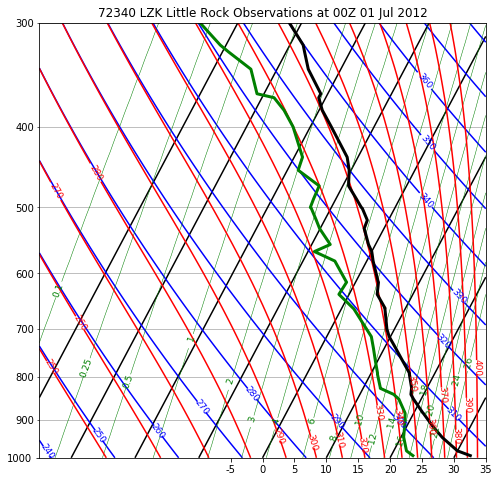

In [9]:
skew=30
fig,ax =plt.subplots(1,1,figsize=(8,8))
corners=[-35,35]
ax,skew = makeSkewWet(ax,corners=corners,skew=skew)
l1,=ax.plot(xcoord_T,sounding['pres'],color='k',label='temp')
l2,=ax.plot(xcoord_Td,sounding['pres'],color='g',label='dew')
[line.set(linewidth=3) for line in [l1,l2]]
out=ax.set(title=title_string)

## turn off log(0) warning

In [12]:
np.seterr(all='ignore');

## find the $\theta_{es}$ of the surface air, draw the adiabat through point

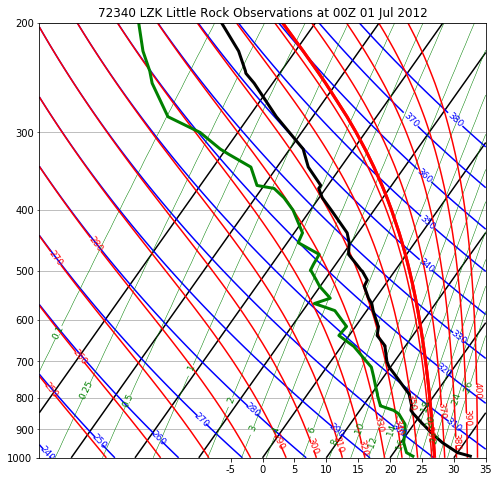

In [13]:
from a405.thermo.thermlib import find_Tmoist,find_thetaep,find_rsat,find_Tv
#
# find thetae of the surface air, at index 0
#
sfc_press,sfc_temp,sfc_td =[sounding[key][0] for key in ['pres','temp','dwpt']]
#
#  convert to mks and find surface rv and thetae
#
sfc_press,sfc_temp,sfc_td = sfc_press*100.,sfc_temp+c.Tc,sfc_td+c.Tc
sfc_rvap = find_rsat(sfc_temp,sfc_press)
sfc_thetae=find_thetaep(sfc_td,sfc_temp,sfc_press)
press=sounding['pres'].values*100.
#
# find the index for 200 hPa pressure -- searchsorted requires
# the pressure array to be increasing, so flip it for the search,
# then flip the index.  Above 200 hPa thetae goes bananas, so
# so trim so we only have good values
#
toplim=len(press) - np.searchsorted(press[::-1],2.e4)
press=press[:toplim]
#
# find temps along that adiabat
#
adia_temps= np.array([find_Tmoist(sfc_thetae,the_press) for the_press in press])
adia_rvaps = find_rsat(adia_temps,press)
adia_rls = sfc_rvap - adia_rvaps
env_temps = (sounding['temp'].values + c.Tc)[:toplim]
env_Td = (sounding['dwpt'].values + c.Tc)[:toplim]
height = sounding['hght'].values[:toplim]
pairs = zip(env_Td,press)
env_rvaps= np.array([find_rsat(td,the_press) for td,the_press in pairs])
env_Tv = find_Tv(env_temps,env_rvaps)
adia_Tv = find_Tv(adia_temps,adia_rvaps,adia_rls)
xcoord_thetae=[]
press_hPa = press*1.e-2
for a_temp,a_press in zip(adia_temps - c.Tc,press_hPa):
    out=convertTempToSkew(a_temp,a_press,skew)
    xcoord_thetae.append(out)
ax.plot(xcoord_thetae,press_hPa,color='r',label='rsat',linewidth=3.)
ax.set(ylim=[1000.,200.])
display(fig)
